## Use feature extraction method to select best featurs 

In [9]:
from sklearn.datasets   import  load_breast_cancer
from sklearn.model_selection import  train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target 
print(np.unique(cancer.target))
print(cancer.data.shape)
print(cancer.target.shape)

[0 1]
(569, 30)
(569,)


In [11]:
estimator = LogisticRegression( solver='liblinear') 
sfs_forward = SequentialFeatureSelector(
                                            estimator,
                                            n_features_to_select= 2 ,
                                            direction='forward',
                                            scoring='accuracy',
                                            cv=5
                                        )

sfs_forward.fit(X, Y)

selected_features_indices = sfs_forward.get_support(indices=True)
print(f"Selected features from cancer dataset (forward): {selected_features_indices}")


Selected features from cancer dataset (forward): [22 26]


In [12]:
sfs_backward = SequentialFeatureSelector(
                                            estimator,
                                            n_features_to_select= 2 ,
                                            direction='backward',
                                            scoring='accuracy',
                                            cv=5
                                        )

sfs_backward.fit(X, Y)

selected_features_indices = sfs_backward.get_support(indices=True)
print(f"Selected features from cancer dataset (backward): {selected_features_indices}")

Selected features from cancer dataset (backward): [23 26]


### use SVC classifier to classify cancer dataset based on selected featurs in last step

In [23]:

X_data = cancer.data
Y_data = cancer.target
X_train , X_test ,Y_train , Y_test = train_test_split(X_data[: ,[ 23,26]], Y_data , test_size= 0.3, random_state=1 , stratify=cancer.target )
print( f'\nX_train_shape\n\n{X_train.shape}\n\nY_train_shape\n\n{X_test.shape}')



X_train_shape

(398, 2)

Y_train_shape

(171, 2)


In [14]:
svc_pipeline = make_pipeline( StandardScaler(),
                              SVC(kernel='linear', random_state=1, gamma=1 , C=1.0)
                            )

In [15]:

svc_pipeline.fit(X_train, Y_train)

print(f'accuracy of logistic regression on train data is equal to:\t {np.round(svc_pipeline.score(X_train, Y_train) , 3)}\n')
print("accuracy of logistic regression on test data is equal to:\t {:.3f}".format(svc_pipeline.score(X_test, Y_test)))


accuracy of logistic regression on train data is equal to:	 0.95

accuracy of logistic regression on test data is equal to:	 0.918


In [16]:
svc_pipeline.predict(X_test[:5, :])

array([0, 1, 1, 0, 0])

In [17]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples

    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=f'Class {cl}', 
                        edgecolor='black')
   

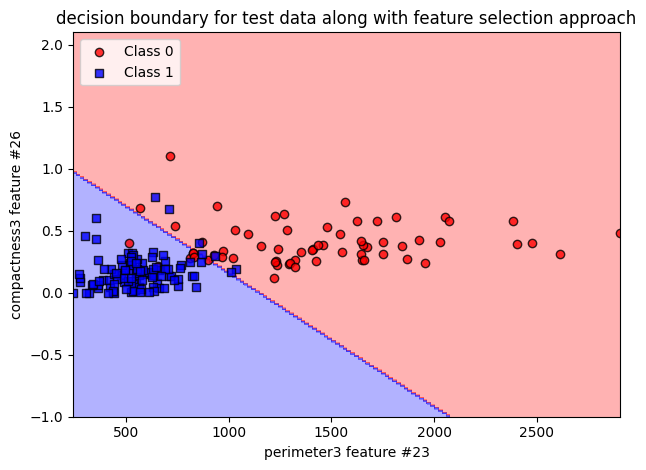

In [18]:
plot_decision_regions(X= X_test, y= Y_test, classifier= svc_pipeline  )
plt.title('decision boundary for test data along with feature selection approach')
plt.xlabel('perimeter3 feature #23')
plt.ylabel('compactness3 feature #26')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./feature_selection_img/decision boundary for test data(Sklearn_training).png', dpi=300)
plt.show()